In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# This function calculates the rise and fall time
def find_mintime_halfmag(y_vals, x_vals): 
    minmag = np.min(y_vals)
    magdiff = 2.5 * np.log10(2)
    minmag_index = int(np.argwhere(y_vals == minmag))

    return x_vals[minmag_index], minmag + magdiff

# This function calculates the rise and fall time
def find_rise_fall(x_interp, y_interp, halfmag, mintime):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - halfmag) < 0.05:
            good_xvals = np.append(good_xvals, xval)

    half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])

    return mintime - half_rising_JD, half_falling_JD - mintime

In [3]:
CV_1 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abppewc_20220603\\detections_ZTF19abppewc.csv")
plotname = CV_1

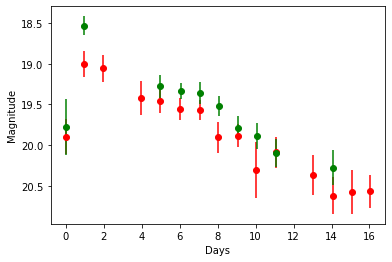

In [4]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.997744
halfmag 19.750318989159954
minmag 18.530201
halfmag 19.282775989159955


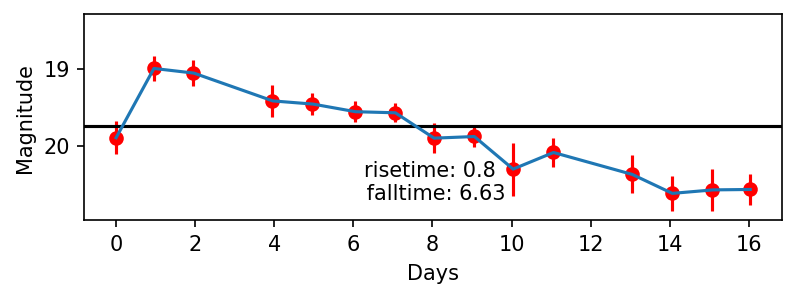

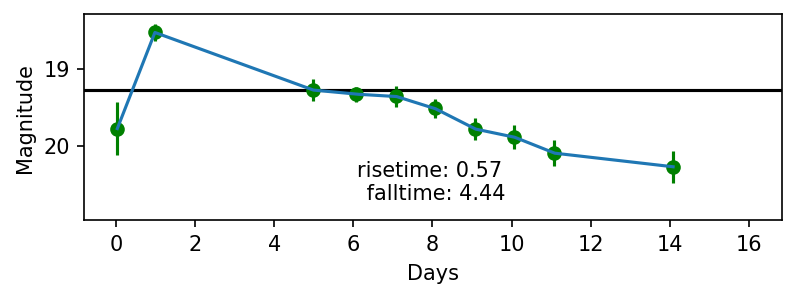

In [5]:
# red filter for CV 1

plotname = CV_1

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [7]:
CV_2 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18acswirx_20220606\\detections_ZTF18acswirx.csv")
plotname = CV_2

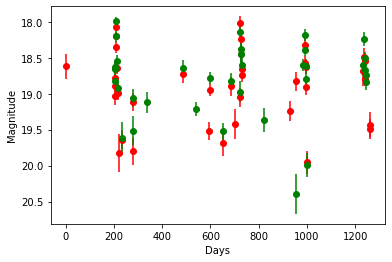

In [8]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.326502
halfmag 19.079076989159955
minmag 18.184113
halfmag 18.936687989159953


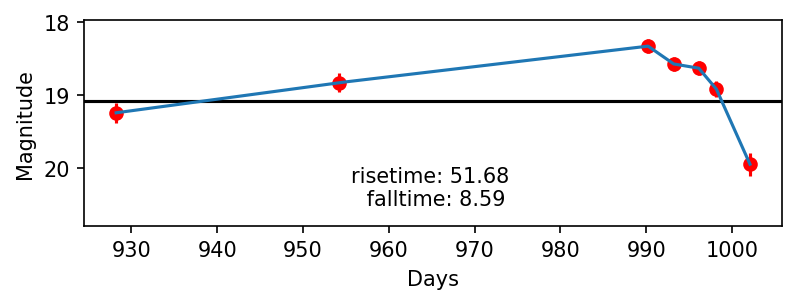

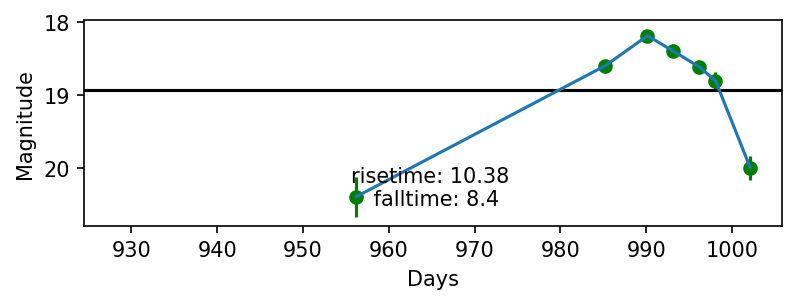

In [11]:
# red filter for CV 2

plotname = CV_2

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 25
finish = 32
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 22
finish = 29
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)

ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [13]:
CV_3 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19aaqstxo_20220606\\detections_ZTF19aaqstxo.csv")
plotname = CV_3

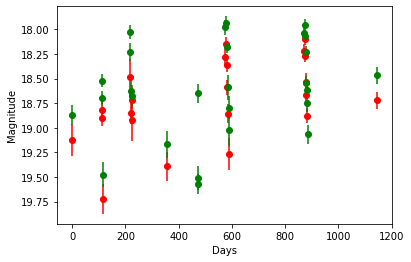

In [14]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.143967
halfmag 18.896541989159953
minmag 17.935453
halfmag 18.688027989159952


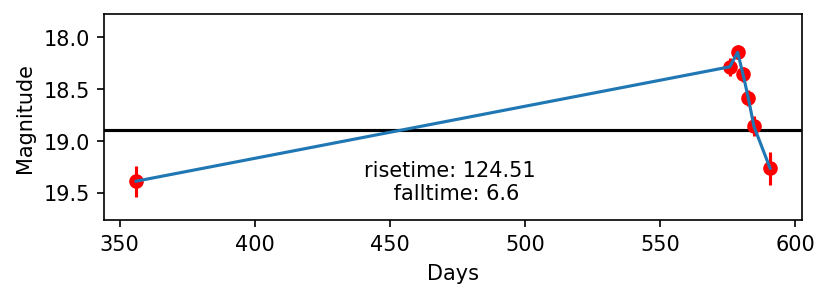

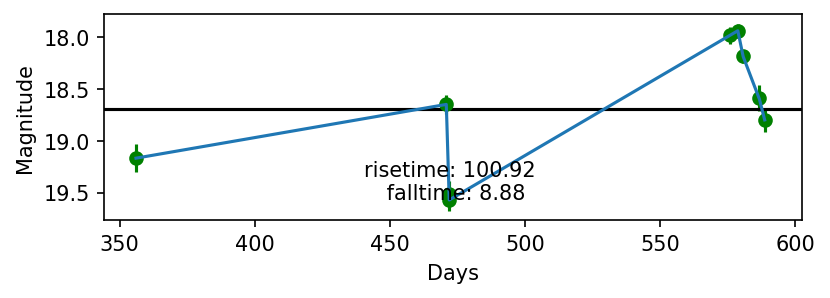

In [15]:
# red filter for CV 3

plotname = CV_3

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 8
finish = 15
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 8
finish = 17
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [17]:
CV_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abzcokk_20220606\\detections_ZTF20abzcokk.csv")
plotname = CV_4

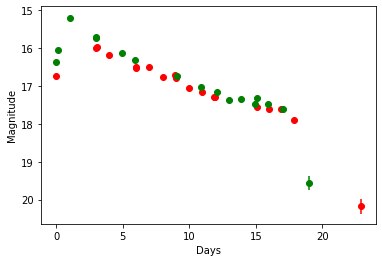

In [18]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 15.974818
halfmag 16.727392989159952
minmag 15.189616
halfmag 15.942190989159952


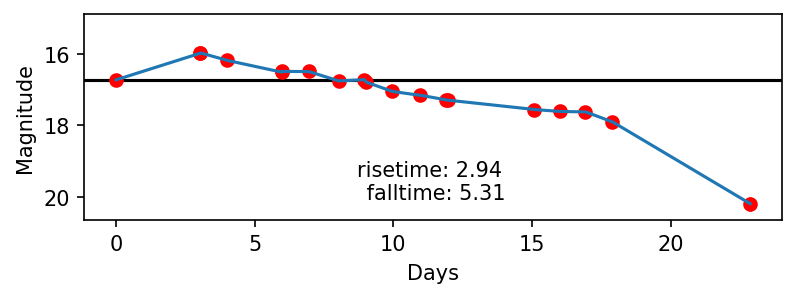

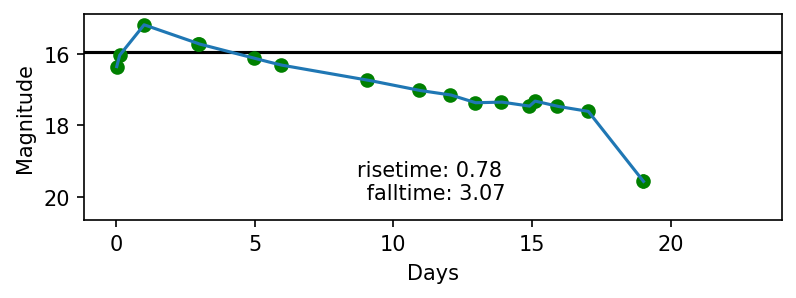

In [19]:
# red filter for CV 4

plotname = CV_4

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [20]:
CV_5 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acaohjl_20220606\\detections_ZTF21acaohjl.csv")
plotname = CV_5

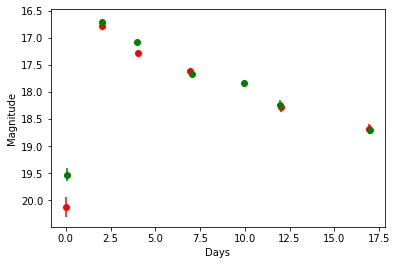

In [21]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.780235
halfmag 17.532809989159954
minmag 16.698427
halfmag 17.451001989159952


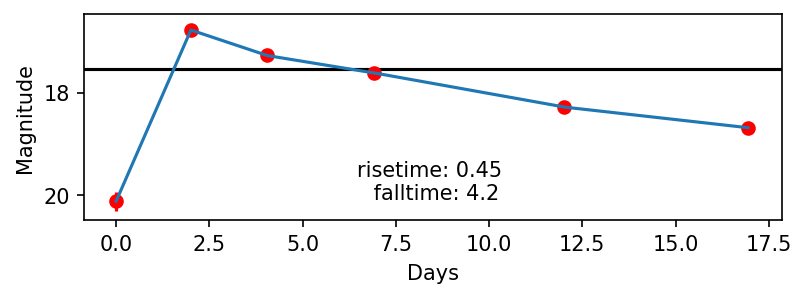

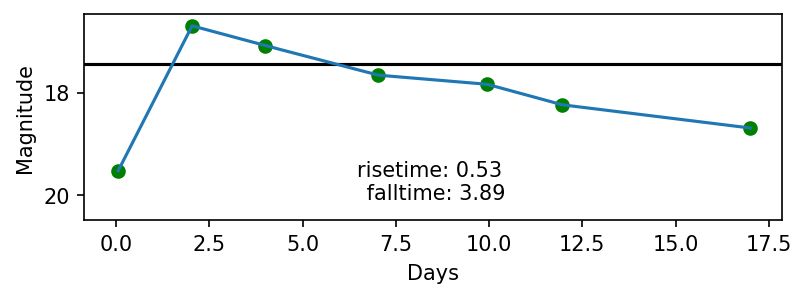

In [22]:
# red filter for CV 5

plotname = CV_5

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [23]:
CV_6 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abbxnbm_20220606\\detections_ZTF21abbxnbm.csv")
plotname = CV_6

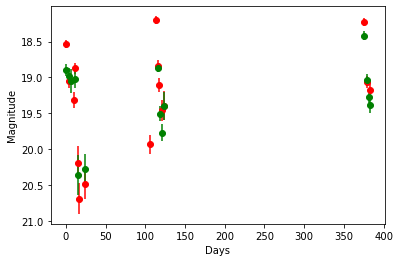

In [24]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.229588
halfmag 18.982162989159953
minmag 18.416746
halfmag 19.169320989159953


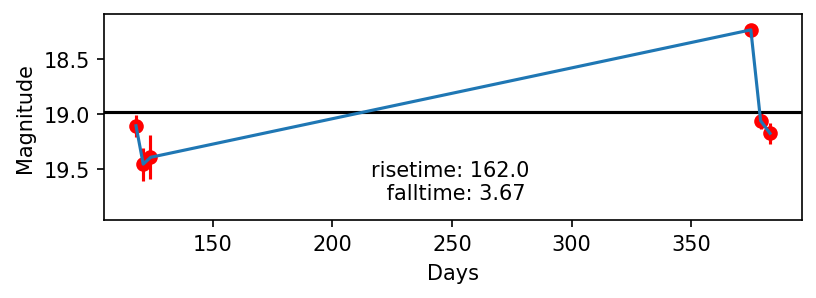

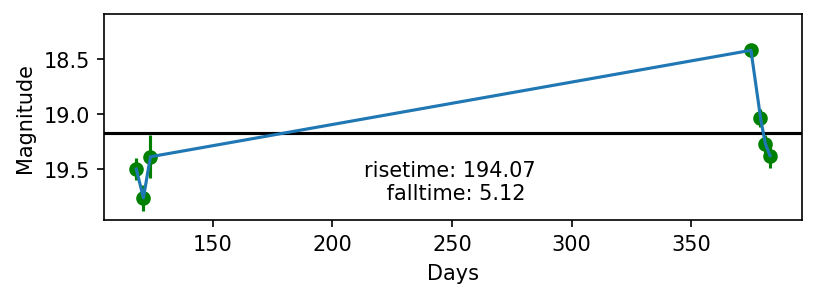

In [25]:
# red filter for CV 6

plotname = CV_6

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 10
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 7
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [26]:
CV_7 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aawbodq_20220606\\detections_ZTF20aawbodq.csv")
plotname = CV_7

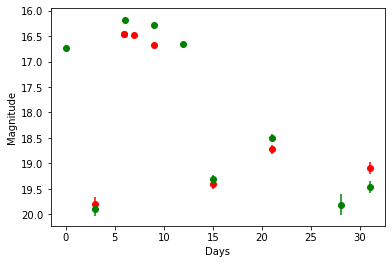

In [27]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.462772
halfmag 17.215346989159954
minmag 16.182114
halfmag 16.93468898915995


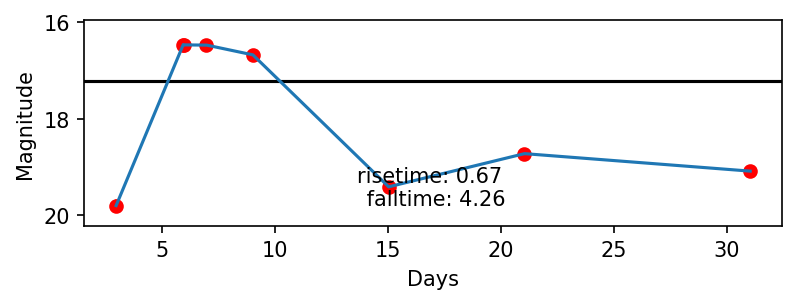

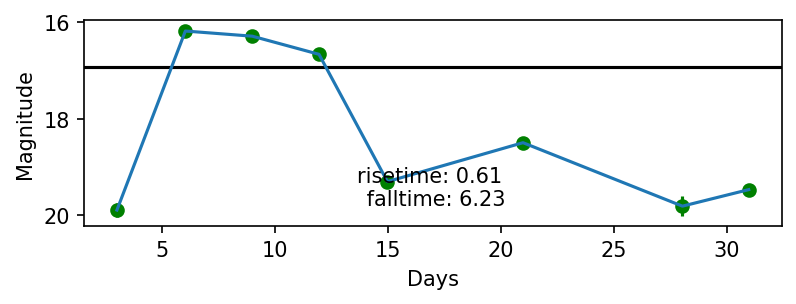

In [28]:
# red filter for CV 7

plotname = CV_7

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 1
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [29]:
CV_8 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19achbhfc_20220606\\detections_ZTF19achbhfc.csv")
plotname = CV_8

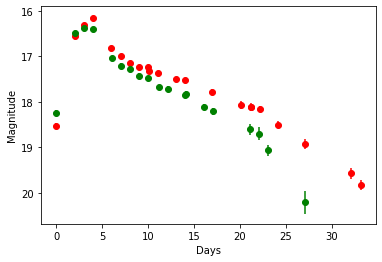

In [30]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.154366
halfmag 16.906940989159953
minmag 16.384924
halfmag 17.137498989159955


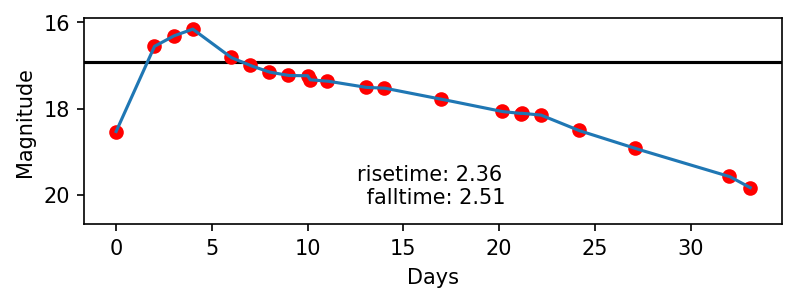

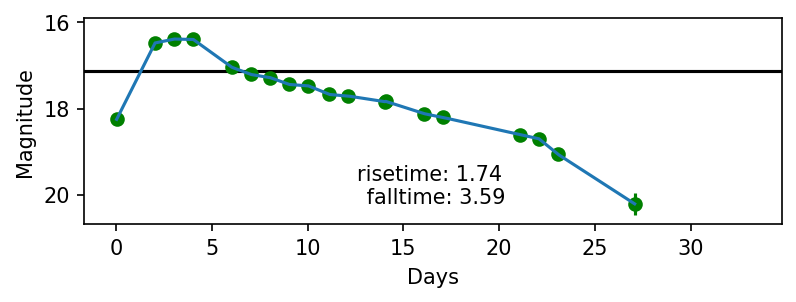

In [31]:
# red filter for CV 8

plotname = CV_8

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)
#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [32]:
CV_9 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abzipjc_20220606\\detections_ZTF19abzipjc.csv")
plotname = CV_9

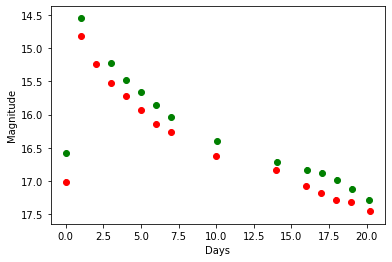

In [33]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 14.81506
halfmag 15.567634989159954
minmag 14.539643
halfmag 15.292217989159953


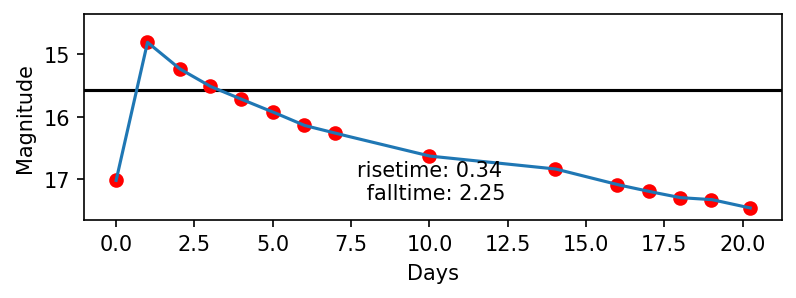

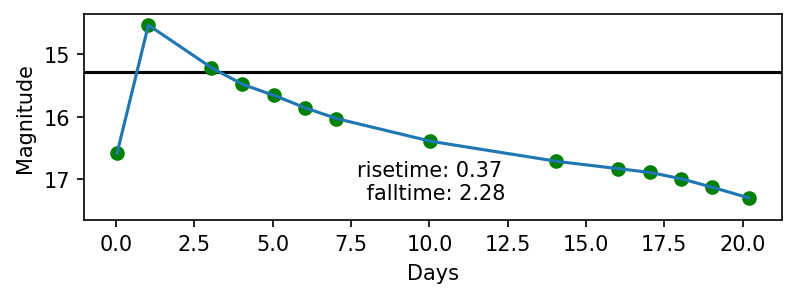

In [34]:
# red filter for CV 9

plotname = CV_9

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [35]:
CV_10 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abyrano_20220606\\detections_ZTF19abyrano.csv")
plotname = CV_10

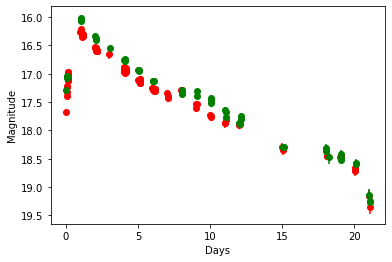

In [36]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.2125
halfmag 16.96507498915995
minmag 16.007322
halfmag 16.75989698915995


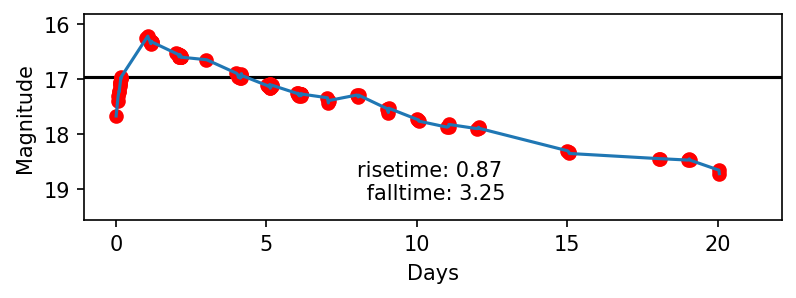

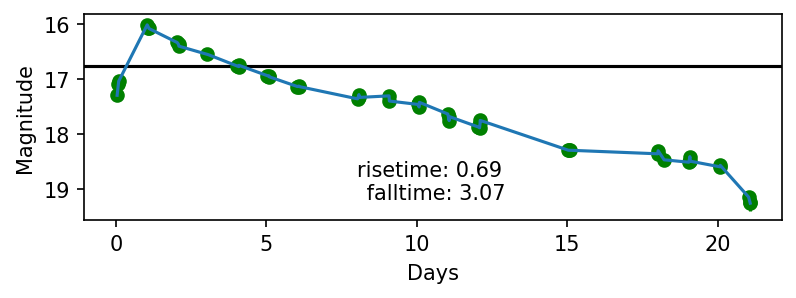

In [37]:
# red filter for CV 10

plotname = CV_10

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()
